In [20]:
import time
import os
import platform, subprocess

SPACE = ' '
LINUXVIDEOPATH = '/dev/video0' # ffplay
DEBUG = 0

class mycamera():
    def __init__(self, duration=3, fps=60):
        self.connection = True
        
        # Camera Parameters
        self.DEVICE_ID = 1
        self.WIDTH = 1280
        self.HEIGHT = 720
        self.FPS = fps
        self.FRAMERATE = fps
        self.counter = 0 # used in the fileName
        self.fileName =  ""
        self.readablefileName = ''
        self.VIDEOSIZE = "1280x720"
        self.DURATION = duration
        self.client = ""
        self.photoform = '%01d.png' # what we need is 2.png
        
        
    
    def take_picture(self, isUsingCounter=True, appendix='', folder=''):
        # we don't need this
        # Allright, we need this 
        self.counter += 1
        if isUsingCounter:
            self.fileName = time.strftime("%Y_%m_%d_%H_%M_%S_No", time.localtime()) + str(self.counter)
            if appendix:
                self.fileName += "_" + appendix + self.photoform
            else:
                self.fileName += self.photoform
        else:
            self.fileName = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime()) 
            if appendix:
                self.fileName += "_" + appendix + self.photoform
            else:
                self.fileName += self.photoform
        if DEBUG == 2:
            print("Filename is {}".format(self.fileName))
            return
        if folder:
            folderPath = "image_analysis/{}/".format(folder)
            if not os.path.exists(folderPath):
                try:
                    os.mkdir(folderPath)
                except Exception as e:
                    print(e)
        if not folder:
            self.fileName = "image_analysis/temp/{}".format(self.fileName)
        else:
            self.fileName = folderPath + self.fileName
        
        self.readablefileName = self.fileName[:-8] + '2.png'
        

        if os.path.exists(self.fileName):
            raise Exception("Same File!")
        if "Linux" in platform.platform():
            # Remember to check the path everytime.
            videoPath = LINUXVIDEOPATH
            fParam = "v4l2"
            videoTypeParm = "-input_format"
        elif "Windows" in platform.platform():
            videoPath = "video='C922 Pro Stream Webcam'"
            fParam = "dshow" 
            videoTypeParm = "-vcodec"

        # only the command is different from take_video
        command = "ffmpeg -f {} -i {} -vframes 2 {}".format(
            fParam, 
            videoPath, 
            self.fileName)
        print(command)
        # ffmpeg -f v4l2 -i /dev/video2 -vframes 1 /home/dongagent/github/CameraControl/algorithm/test.png

        if "Linux" in platform.platform():
            # Linux
            return subprocess.Popen([command], stdout=subprocess.PIPE, shell=True)
        elif "Windows" in platform.platform():
            # Windows
            return subprocess.Popen(["pwsh", "-Command", command], stdout=subprocess.PIPE)

In [22]:
cameraa = mycamera()
process = cameraa.take_picture()
process.wait()


ffmpeg -f v4l2 -i /dev/video0 -vframes 2 image_analysis/temp/2022_12_09_02_25_07_No1%01d.png


0

/home/dongagent/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py workdir



SystemExit: 1

/home/dongagent/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
frame = Image.open('image_analysis/anger/2024_11_05_14_50_37_anger_test.png')  # Uncomment if you need to load the image
print(frame.size)

(1280, 720)


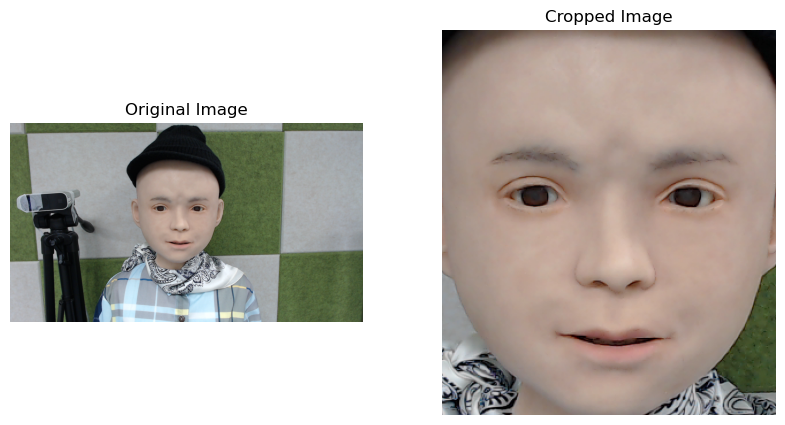

In [31]:
# figure xyhw
from PIL import Image
import matplotlib.pyplot as plt

# Open the image (assuming 'frame' is the original image as a PIL Image)
frame = Image.open('image_analysis/anger/2024_11_05_14_50_37_anger_test.png')  # Uncomment if you need to load the image

# Crop coordinates
# ----------- EDIT HERE -------------
# ***********************************
start_x, start_y, end_x, end_y = 465, 165, 755, 500
# ***********************************
# ----------- EDIT HERE -------------



# Crop the image
face = frame.crop((start_x, start_y, end_x, end_y))

# Display the original and cropped images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Original image
axes[0].imshow(frame)
axes[0].set_title("Original Image")
axes[0].axis("off")
# Cropped image
axes[1].imshow(face)
axes[1].set_title("Cropped Image")
axes[1].axis("off")

# Show the plots
plt.show()

